### Step 1: Import Necessary Packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Step 2: Load the Data

In [2]:
data= pd.read_csv('https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv')
data.shape, data.head()

((10000, 4),
    default  student      balance        income
 0        0        0   729.526495  44361.625074
 1        0        1   817.180407  12106.134700
 2        0        0  1073.549164  31767.138947
 3        0        0   529.250605  35704.493935
 4        0        0   785.655883  38463.495879)

### Step 3: Create Training and Test Samples

In [6]:
#Define predictor variables
X= data[['student','balance','income']]

#Define predicted/response/target variable
y= data['default']

#split the dataset into training (70%) and testing (30%) sets

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((7000, 3), (3000, 3))

### Step 4: Fit the Logistic Regression Model

In [7]:
#instantiate the model
log_regression= LogisticRegression()

#fit the model using the training data
log_regression.fit(X,y)

#use model to make predictions on test data
y_pred= log_regression.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


### Step 5: Model Diagnostics

In [8]:
# First, we’ll create the confusion matrix for the model:

cnf= metrics.confusion_matrix(y_test, y_pred)
cnf

array([[2887,   19],
       [  77,   17]], dtype=int64)

In [9]:
# We can also obtain the accuracy of the model, which tells us the percentage of 
#correction predictions the model made:

print('Accuracy', metrics.accuracy_score(y_test,y_pred))

Accuracy 0.968


Lastly, we can plot the ROC (Receiver Operating Characteristic) Curve which displays the percentage of true positives predicted by the model as the prediction probability cutoff is lowered from 1 to 0.

The higher the AUC (area under the curve), the more accurately our model is able to predict outcomes:

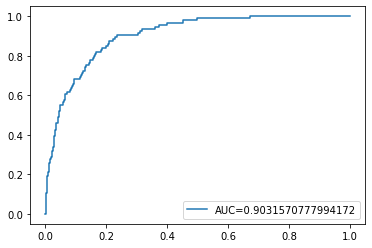

In [10]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

<AxesSubplot:xlabel='default', ylabel='count'>

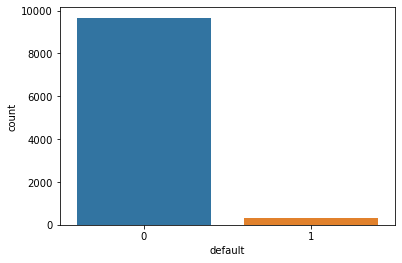

In [11]:
import seaborn as sbn

sbn.countplot(x='default', data=data)

<AxesSubplot:xlabel='default', ylabel='count'>

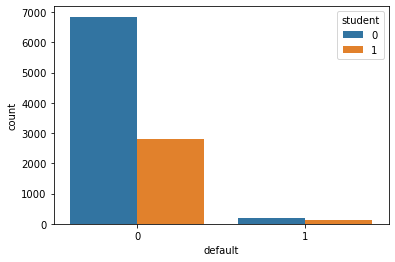

In [13]:
sbn.countplot(x='default', hue='student', data=data)